In [112]:
import pandas as pd
import matplotlib.dates as mdates
from plotnine import ggplot, aes, geom_point, labs

# Read the XLS file
data = pd.read_csv('Midterm_Project2_final.csv')

# Assuming your date column is named 'Date' (replace 'Date' with your actual column name)
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert the 'Date' column to datetime
data.set_index('DATE', inplace=True)  # Set 'Date' as the index
data.index = pd.to_datetime(data.index)

# Info on the data
print(data.index.min(), data.index.max())
data.info()

2014-01-01 00:00:00 2024-08-01 00:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2014-01-01 to 2024-08-01
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   CPI for All Urban Consumers: All Items Less Food and Energy  128 non-null    float64
 1   U.S. National Home Price Index                               127 non-null    float64
 2   Industrial Production: Total Index                           128 non-null    float64
 3   All Employees, Total Nonfarm                                 128 non-null    int64  
 4   Personal Saving Rate                                         128 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [113]:
data.describe()

,CPI for All Urban Consumers: All Items Less Food and Energy,U.S. National Home Price Index,Industrial Production: Total Index,"All Employees, Total Nonfarm",Personal Saving Rate
count,128.000000,127.000000,128.000000,128.00000,128.000000
mean,268.120922,226.171685,100.864814,147563.40625,6.878125
std,24.737659,52.474030,2.963890,6075.01364,4.248667
min,235.961000,161.921000,84.681200,130421.00000,2.000000
25%,248.737250,182.321000,99.438475,142889.50000,5.200000
50%,262.107000,207.533000,101.737700,147448.00000,5.750000
75%,285.618500,279.367000,102.816325,151648.00000,6.825000
max,319.768000,321.556000,104.103800,158779.00000,32.000000


# Line Graph

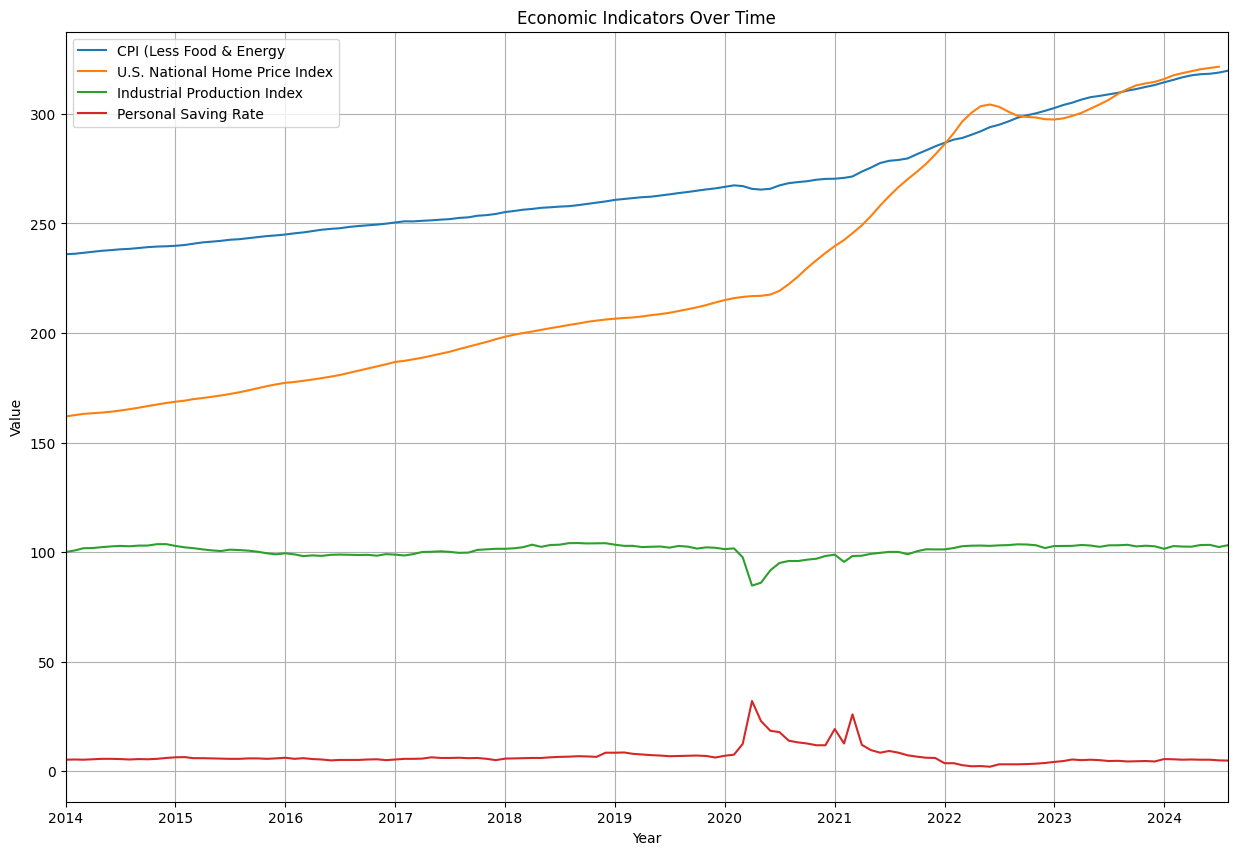

In [114]:
# Assume `data` is your dataset with a datetime index and the selected variables
plt.figure(figsize=(15, 10))

# Plot each variable
plt.plot(data.index, data['CPI for All Urban Consumers: All Items Less Food and Energy'], label='CPI (Less Food & Energy')
plt.plot(data.index, data['U.S. National Home Price Index'], label='U.S. National Home Price Index')
plt.plot(data.index, data['Industrial Production: Total Index'], label='Industrial Production Index')
plt.plot(data.index, data['Personal Saving Rate'], label='Personal Saving Rate')

# Ensure the x-axis uses years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'

# Set x-axis limits to match the full date range of the dataset
plt.xlim(data.index.min(), data.index.max())

# Customize
plt.title('Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


# Show plot
plt.show()


# Line Graph with Highlight

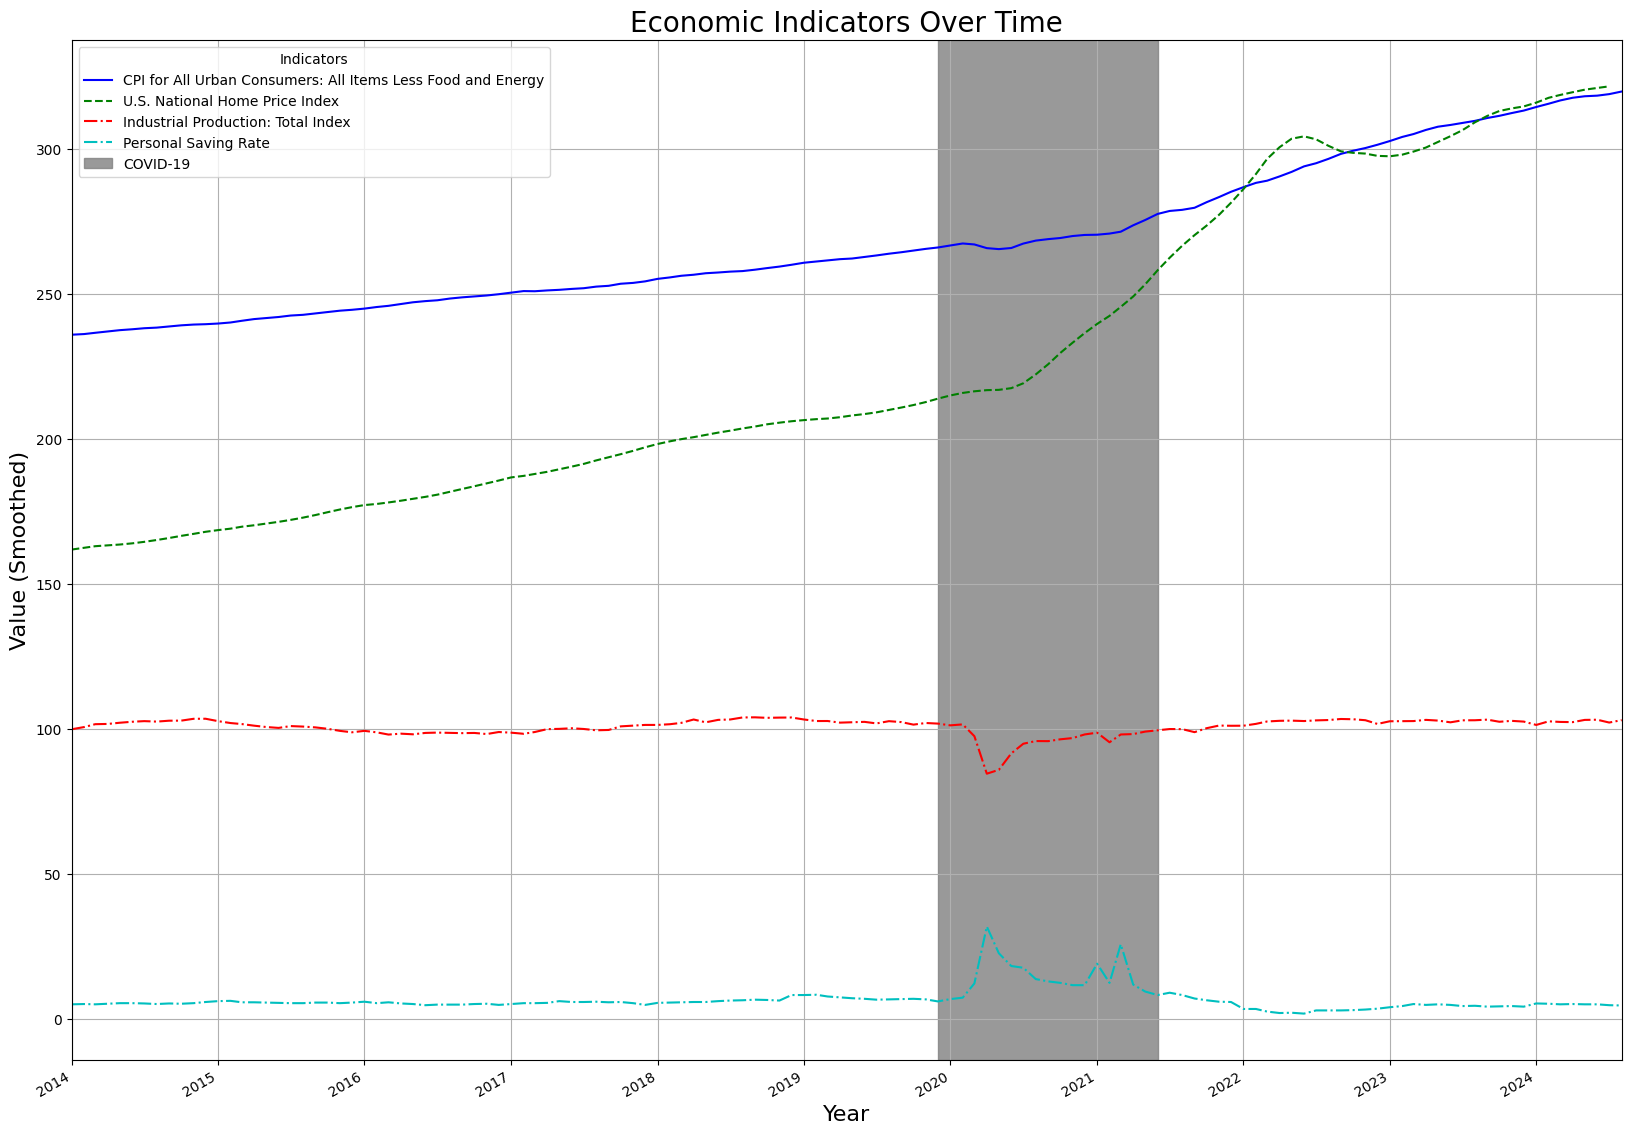

In [119]:
# Ensure index is datetime
data.index = pd.to_datetime(data.index)

# Exclude "All Employees, Total Nonfarm"
df_filtered = data.drop(columns=["All Employees, Total Nonfarm"])

# Smoothing: Calculate rolling mean to smooth out short-term fluctuations
# df_smoothed = df_filtered.rolling(window=12).mean()  # 12-month (1-year) rolling average

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 15))

# Color palette and line styles
colors = ['b', 'g', 'r', 'c']
styles = ['-', '--', '-.', '-.']

# Plot each variable with rolling mean and individual styling
for i, col in enumerate(df_filtered.columns):
    ax.plot(df_filtered.index, df_filtered[col], label=col, color=colors[i % len(colors)], linestyle=styles[i % len(styles)])

# Set major ticks every 10 years
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set limits and labels
ax.set_xlim(df_filtered.index.min(), df_filtered.index.max())
ax.set_title('Economic Indicators Over Time', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Value (Smoothed)', fontsize=16)

# Highlight specific events (e.g., COVID-19)
ax.axvspan(pd.Timestamp('2019-12-01'), pd.Timestamp('2021-06-01'), color='grey', alpha=0.8, label='COVID-19')

# Customize grid and legend
ax.grid(True)
ax.legend(title="Indicators", fontsize=10, loc='upper left')

# Automatically rotate the x-axis labels
fig.autofmt_xdate()

# Save and Show plot
plt.savefig('Economic_indicators.png')  # Adjust dpi and bbox_inches as needed
plt.show()
